# **Tugas 2 - Pre-Processing Data dan TF-IDF**

**Nama : Adz Dzikry Pradana Putra**

**NIM  : 210411100093**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/data_berita_detik.csv")
df.head(6)

,judul,isi,tanggal,kategori
0,Nimo Umumkan Kolaborasi dengan Tencent di Game...,Jakarta - Platform live streaming game Nimo me...,"Rabu, 28 Agu 2024 11:30 WIB",Games
1,"Cara Bikin Nama FF Kosong dengan Spasi, Mudah ...",Jakarta - Bikin nama Free Fire (FF) kosong den...,"Rabu, 28 Agu 2024 06:15 WIB",Games
2,"500+ Nama FF Seram Buat Gamer Cowok, Bikin Law...",Jakarta - Sepertinya punya nama Free Fire (FF)...,"Selasa, 27 Agu 2024 20:15 WIB",Games
3,"PS5 Pro Bakal Rilis Bulan Depan, Harganya Berapa?",Jakarta - Rumor peluncuran PlayStation 5 Pro s...,"Selasa, 27 Agu 2024 19:15 WIB",Games
4,"Mod Black Myth: Wukong, Gamer Bisa Pakai Son G...","Jakarta - Bukan The Destined One, sekarang kar...","Selasa, 27 Agu 2024 15:15 WIB",Games
5,"TimelessStar.com Hadirkan Kursi Performance, C...",Jakarta - Penggemar e-sports dan game seharusn...,"Selasa, 27 Agu 2024 12:00 WIB",Games


**CLEANING**


---



**Cleaning Data** adalah proses awal dalam pengolahan teks yang bertujuan untuk membersihkan data
teks dari elemen-elemen yang tidak diperlukan atau mengganggu, seperti :
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [5]:
import re
import string
import nltk

def remove_url(text):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', text)

def remove_html(text):
  html = re.compile(r'<.#?>')
  return html.sub(r'', text)

def remove_emoji(text):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def remove_symbols(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #menghapus semua simbol
  return text

df['Hasil cleansing'] = df['isi'].apply(lambda x: remove_url(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_html(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_emoji(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_symbols(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing
0,Nimo Umumkan Kolaborasi dengan Tencent di Game...,Jakarta - Platform live streaming game Nimo me...,"Rabu, 28 Agu 2024 11:30 WIB",Games,Jakarta Platform live streaming game Nimo men...
1,"Cara Bikin Nama FF Kosong dengan Spasi, Mudah ...",Jakarta - Bikin nama Free Fire (FF) kosong den...,"Rabu, 28 Agu 2024 06:15 WIB",Games,Jakarta Bikin nama Free Fire FF kosong dengan...
2,"500+ Nama FF Seram Buat Gamer Cowok, Bikin Law...",Jakarta - Sepertinya punya nama Free Fire (FF)...,"Selasa, 27 Agu 2024 20:15 WIB",Games,Jakarta Sepertinya punya nama Free Fire FF se...
3,"PS5 Pro Bakal Rilis Bulan Depan, Harganya Berapa?",Jakarta - Rumor peluncuran PlayStation 5 Pro s...,"Selasa, 27 Agu 2024 19:15 WIB",Games,Jakarta Rumor peluncuran PlayStation Pro sem...
4,"Mod Black Myth: Wukong, Gamer Bisa Pakai Son G...","Jakarta - Bukan The Destined One, sekarang kar...","Selasa, 27 Agu 2024 15:15 WIB",Games,Jakarta Bukan The Destined One sekarang karak...
5,"TimelessStar.com Hadirkan Kursi Performance, C...",Jakarta - Penggemar e-sports dan game seharusn...,"Selasa, 27 Agu 2024 12:00 WIB",Games,Jakarta Penggemar esports dan game seharusnya...


**CASE FOLDING**


---



**Casefolding** adalah langkah dalam preprocessing yang melibatkan
pengonversian semua karakter teks menjadi huruf kecil. Tujuan dari casefolding adalah
untuk menghilangkan ambiguitas yang dapat muncul karena perbedaan huruf besar
dan kecil. Misalnya, kata yang sama tetapi ditulis dengan huruf besar atau kecil akan
dianggap sebagai entitas yang berbeda. Dengan menerapkan casefolding, konsistensi
dalam representasi kata dapat dipertahankan.

In [6]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['Hasil case_folding'] = df['Hasil cleansing'].apply(case_folding)

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding
0,Nimo Umumkan Kolaborasi dengan Tencent di Game...,Jakarta - Platform live streaming game Nimo me...,"Rabu, 28 Agu 2024 11:30 WIB",Games,Jakarta Platform live streaming game Nimo men...,jakarta platform live streaming game nimo men...
1,"Cara Bikin Nama FF Kosong dengan Spasi, Mudah ...",Jakarta - Bikin nama Free Fire (FF) kosong den...,"Rabu, 28 Agu 2024 06:15 WIB",Games,Jakarta Bikin nama Free Fire FF kosong dengan...,jakarta bikin nama free fire ff kosong dengan...
2,"500+ Nama FF Seram Buat Gamer Cowok, Bikin Law...",Jakarta - Sepertinya punya nama Free Fire (FF)...,"Selasa, 27 Agu 2024 20:15 WIB",Games,Jakarta Sepertinya punya nama Free Fire FF se...,jakarta sepertinya punya nama free fire ff se...
3,"PS5 Pro Bakal Rilis Bulan Depan, Harganya Berapa?",Jakarta - Rumor peluncuran PlayStation 5 Pro s...,"Selasa, 27 Agu 2024 19:15 WIB",Games,Jakarta Rumor peluncuran PlayStation Pro sem...,jakarta rumor peluncuran playstation pro sem...
4,"Mod Black Myth: Wukong, Gamer Bisa Pakai Son G...","Jakarta - Bukan The Destined One, sekarang kar...","Selasa, 27 Agu 2024 15:15 WIB",Games,Jakarta Bukan The Destined One sekarang karak...,jakarta bukan the destined one sekarang karak...
5,"TimelessStar.com Hadirkan Kursi Performance, C...",Jakarta - Penggemar e-sports dan game seharusn...,"Selasa, 27 Agu 2024 12:00 WIB",Games,Jakarta Penggemar esports dan game seharusnya...,jakarta penggemar esports dan game seharusnya...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi** memisahkan kata per kata dengan operator tokenize pada text
processing. Tujuannya untuk dikelompokkan kemunculan suatu kata pada proses
selanjutnya.Lebih jelasnya untuk memecah teks menjadi unit terkecil yang dapat
berupa kata,frasa atau karakter terpisah.

In [8]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['Hasil case_folding'].apply(tokenize)

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding,tokenize
0,Nimo Umumkan Kolaborasi dengan Tencent di Game...,Jakarta - Platform live streaming game Nimo me...,"Rabu, 28 Agu 2024 11:30 WIB",Games,Jakarta Platform live streaming game Nimo men...,jakarta platform live streaming game nimo men...,"[jakarta, platform, live, streaming, game, nim..."
1,"Cara Bikin Nama FF Kosong dengan Spasi, Mudah ...",Jakarta - Bikin nama Free Fire (FF) kosong den...,"Rabu, 28 Agu 2024 06:15 WIB",Games,Jakarta Bikin nama Free Fire FF kosong dengan...,jakarta bikin nama free fire ff kosong dengan...,"[jakarta, bikin, nama, free, fire, ff, kosong,..."
2,"500+ Nama FF Seram Buat Gamer Cowok, Bikin Law...",Jakarta - Sepertinya punya nama Free Fire (FF)...,"Selasa, 27 Agu 2024 20:15 WIB",Games,Jakarta Sepertinya punya nama Free Fire FF se...,jakarta sepertinya punya nama free fire ff se...,"[jakarta, sepertinya, punya, nama, free, fire,..."
3,"PS5 Pro Bakal Rilis Bulan Depan, Harganya Berapa?",Jakarta - Rumor peluncuran PlayStation 5 Pro s...,"Selasa, 27 Agu 2024 19:15 WIB",Games,Jakarta Rumor peluncuran PlayStation Pro sem...,jakarta rumor peluncuran playstation pro sem...,"[jakarta, rumor, peluncuran, playstation, pro,..."
4,"Mod Black Myth: Wukong, Gamer Bisa Pakai Son G...","Jakarta - Bukan The Destined One, sekarang kar...","Selasa, 27 Agu 2024 15:15 WIB",Games,Jakarta Bukan The Destined One sekarang karak...,jakarta bukan the destined one sekarang karak...,"[jakarta, bukan, the, destined, one, sekarang,..."
5,"TimelessStar.com Hadirkan Kursi Performance, C...",Jakarta - Penggemar e-sports dan game seharusn...,"Selasa, 27 Agu 2024 12:00 WIB",Games,Jakarta Penggemar esports dan game seharusnya...,jakarta penggemar esports dan game seharusnya...,"[jakarta, penggemar, esports, dan, game, sehar..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yakni sebagai tahap pemilihan kata-kata yang
dianggap tidak penting atau kata yang tidak relevan.Untuk mengetahui kata mana yang
tidak relevan berdasarkan dari daftar stopword removal yang digunakan.

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Pada tahap ini menggunakan library **NLTK stopword removal bahasa indonesia**.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.

In [11]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Hasil stopword'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding,tokenize,Hasil stopword
0,Nimo Umumkan Kolaborasi dengan Tencent di Game...,Jakarta - Platform live streaming game Nimo me...,"Rabu, 28 Agu 2024 11:30 WIB",Games,Jakarta Platform live streaming game Nimo men...,jakarta platform live streaming game nimo men...,"[jakarta, platform, live, streaming, game, nim...",jakarta platform live streaming game nimo meng...
1,"Cara Bikin Nama FF Kosong dengan Spasi, Mudah ...",Jakarta - Bikin nama Free Fire (FF) kosong den...,"Rabu, 28 Agu 2024 06:15 WIB",Games,Jakarta Bikin nama Free Fire FF kosong dengan...,jakarta bikin nama free fire ff kosong dengan...,"[jakarta, bikin, nama, free, fire, ff, kosong,...",jakarta bikin nama free fire ff kosong spasi g...
2,"500+ Nama FF Seram Buat Gamer Cowok, Bikin Law...",Jakarta - Sepertinya punya nama Free Fire (FF)...,"Selasa, 27 Agu 2024 20:15 WIB",Games,Jakarta Sepertinya punya nama Free Fire FF se...,jakarta sepertinya punya nama free fire ff se...,"[jakarta, sepertinya, punya, nama, free, fire,...",jakarta nama free fire ff seram salah siasat l...
3,"PS5 Pro Bakal Rilis Bulan Depan, Harganya Berapa?",Jakarta - Rumor peluncuran PlayStation 5 Pro s...,"Selasa, 27 Agu 2024 19:15 WIB",Games,Jakarta Rumor peluncuran PlayStation Pro sem...,jakarta rumor peluncuran playstation pro sem...,"[jakarta, rumor, peluncuran, playstation, pro,...",jakarta rumor peluncuran playstation pro mengu...
4,"Mod Black Myth: Wukong, Gamer Bisa Pakai Son G...","Jakarta - Bukan The Destined One, sekarang kar...","Selasa, 27 Agu 2024 15:15 WIB",Games,Jakarta Bukan The Destined One sekarang karak...,jakarta bukan the destined one sekarang karak...,"[jakarta, bukan, the, destined, one, sekarang,...",jakarta the destined one karakter utama black ...
5,"TimelessStar.com Hadirkan Kursi Performance, C...",Jakarta - Penggemar e-sports dan game seharusn...,"Selasa, 27 Agu 2024 12:00 WIB",Games,Jakarta Penggemar esports dan game seharusnya...,jakarta penggemar esports dan game seharusnya...,"[jakarta, penggemar, esports, dan, game, sehar...",jakarta penggemar esports game asing timelesss...


In [12]:
df.to_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/hasil_preprocesing.csv",encoding='utf8', index=False)

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

**Count Vectorizer** mengonversi setiap dokumen teks menjadi vektor yang berisi
frekuensi kemunculan setiap kata dalam dokumen tersebut.Pembobotan TF-IDF
menghitung nilai bobot setiap kata untuk setiap dokumen. Ini dibagi menjadi dua proses
yaitu **TF** dan **IDF**.

**TF (Term Frequency)** menghitung jumlah kemunculan setiap kata dalam dokumen,
dan dengan kemunculan kata terbanyak, nilai kata tersebut adalah yang terbesar.

**IDF (Inverse Document Frequency)** menghitung jumlah dokumen untuk setiap kata yang
jarang muncul dalam dokumen yang dianggap memiliki nilai terbesar. Jika kata tersebut
memiliki banyak kemunculan kata dalam dokumen, hasilnya akan memiliki nilai yang
kecil.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/hasil_preprocesing.csv", sep=",")

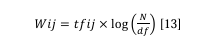

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['Hasil stopword'])

# Mengubah kedalam DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aao,aarav,abg,abnormal,abyssal,acap,acara,aces,aciel,acne,...,zenith,zente,zero,zeus,zinon,zola,zombie,zone,zora,zs
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.025269,0.000000,0.000000,0.000000,0.025269,0.000000,0.000000,...,0.000000,0.000000,0.025269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025269
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044118,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070431,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036642,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.016238,0.016238,0.000000,0.016238,0.000000,0.000000,0.000000,0.016238,0.016238,...,0.000000,0.016238,0.000000,0.016238,0.016238,0.016238,0.000000,0.000000,0.016238,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.031264,0.000000,0.000000,0.026577,0.000000,0.031264,0.000000,0.026577,0.000000,0.000000,...,0.031264,0.000000,0.026577,0.000000,0.000000,0.000000,0.000000,0.031264,0.000000,0.026577
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
